In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PEG/0.69 mole acetone-water mixture analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_peg_awmix = mda.Universe("n6peg_awmix/n6peg_awmix.pdb", "n6peg_awmix/awmix_n6peg.xtc")

In [6]:
n6_peg_awmix.trajectory

<XTCReader n6peg_prod_ace/noace_n6peg.xtc with 18001 frames of 45 atoms>

In [7]:
len(n6_peg_awmix.trajectory)

18001

In [7]:
#Select the polymer heavy atoms 
peg_n6awmix = n6_peg_awmix.select_atoms("resname sPEG PEG tPEG and not type H")

In [8]:
crv_n6peg_awmix = pers_length(peg_n6awmix,6)
crv_n6peg_awmix

array([[1.        , 0.99183914, 0.98653879, 0.99083812, 0.99465856],
       [0.        , 1.        , 2.        , 3.        , 4.        ],
       [0.        , 0.        , 9.41170055, 0.        , 0.        ]])

In [9]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_peg_awmix.trajectory[0:18000]:
    n6_mon1_awmix = n6_peg_awmix.select_atoms("resid 1")
    n6_mon2_awmix = n6_peg_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1_awmix.center_of_mass(), n6_mon2_awmix.center_of_mass(), 
                                                   box=n6_peg_awmix.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [10]:
com_bond

array([[3.29015272, 3.0615564 , 3.45943953, ..., 3.18612349, 3.13161704,
        3.10741132]])

In [11]:
lb_awmix_pn6 = np.mean(com_bond)
lb_awmix_pn6

3.223841660480229

In [12]:
np.std(com_bond)

0.1574573898792014

### Radius of Gyration vs. time N = 6 PEG/0.69 mole acetone-water mixture

In [13]:
n6peg_rgens_awmix, cor_n6peg_awmix, N6peg_cos_awmix, rgawmix_n6peg = get_rg_pers_poly(peg_n6awmix, n6_peg_awmix, 0, 18000)

In [14]:
n6peg_rgens_awmix[0].shape

(18000,)

In [15]:
cor_n6peg_awmix[3]

array([0., 1., 2., 3., 4.])

In [16]:
N6peg_cos_awmix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99183914, 0.98185403, 0.97451777, ..., 0.88066425, 0.91474538,
        0.91383673],
       [0.98653879, 0.93875622, 0.9580052 , ..., 0.71865739, 0.74832468,
        0.78276003],
       [0.99083812, 0.87683644, 0.97197731, ..., 0.51852731, 0.50651881,
        0.59800455],
       [0.99465856, 0.77751863, 0.93172742, ..., 0.22723965, 0.11534109,
        0.14396711]])

In [17]:
rgawmix_n6peg

4.255501025463929

In [18]:
np.std(n6peg_rgens_awmix)

0.6103649860018241

In [19]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

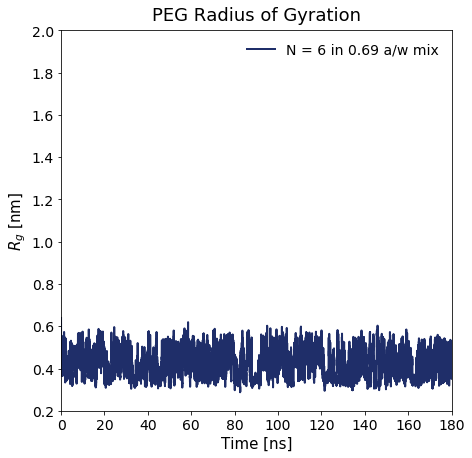

In [59]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_awmix[0]/10,linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PEG/acetone

In [22]:
# x values
blen_awmix = cor_n6peg_awmix[3]*lb_awmix_pn6
#nt_tt[0] = 0
blen_awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664])

In [23]:
mk_n6p_awmix = cor_n6peg_awmix[1]/cor_n6peg_awmix[0]
mk_n6p_awmix

array([5.67795837e-17, 4.24071117e-02, 1.84983200e-01, 5.71811741e-01,
       1.43423595e+00])

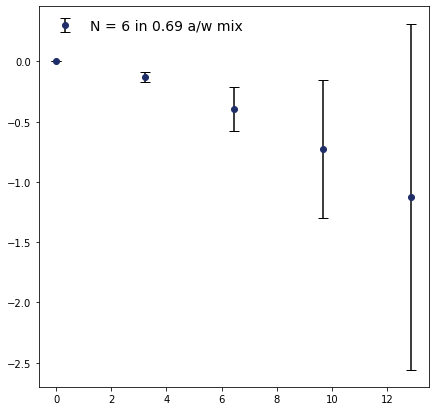

In [62]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in 0.69 a/w mix'], frameon=False, fontsize=14)

In [38]:
# 4 points give the best fits for N = 6 peg in water
n6_blkspeg_awmix , n6peg_lpawmix = bavg_pers_cnt(5, peg_n6awmix, n6_peg_awmix, lb_awmix_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 13.681590735122702
Error in Lp from fit [Angstroms], 95% CL : 3.7543155681582117
R2 score: 0.94764961248669
6000
9000
Lp [Angstroms]: 14.545926614777606
Error in Lp from fit [Angstroms], 95% CL : 3.606788835829517
R2 score: 0.9563112221915082
9000
12000
Lp [Angstroms]: 17.394214471442172
Error in Lp from fit [Angstroms], 95% CL : 3.4924006671848953
R2 score: 0.9700553030794369
12000
15000
Lp [Angstroms]: 12.305072054485999
Error in Lp from fit [Angstroms], 95% CL : 3.9400578474101975
R2 score: 0.9316851080899553
15000
18000
Lp [Angstroms]: 13.896267547168607
Error in Lp from fit [Angstroms], 95% CL : 3.9167516006662244
R2 score: 0.9452165364378042


In [39]:
n6_blkspeg_awmix

{'Avg Radius of gyration': array([4.16949192, 4.26212192, 4.42600886, 4.10310356, 4.2058422 ]),
 'Avg persistence length': array([13.68159074, 14.54592661, 17.39421447, 12.30507205, 13.89626755])}

In [40]:
n6peg_lpawmix

array([[ 1.36815907e+01,  1.45459266e+01,  1.73942145e+01,
         1.23050721e+01,  1.38962675e+01],
       [ 3.75431557e+00,  3.60678884e+00,  3.49240067e+00,
         3.94005785e+00,  3.91675160e+00],
       [-7.30909161e-02, -6.87477688e-02, -5.74903800e-02,
        -8.12673014e-02, -7.19617693e-02],
       [ 4.64400766e-03,  3.35469950e-03,  1.53817802e-03,
         7.81711158e-03,  4.74938253e-03]])

In [41]:
n6peg_lpawmix[2]

array([-0.07309092, -0.06874777, -0.05749038, -0.0812673 , -0.07196177])

In [42]:
np.mean(n6peg_lpawmix[3])

0.004420675856758399

In [43]:
def line_fit(slope, x):
    return slope*x 

In [44]:
blen_awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664])

In [45]:
gg_n6peg_awmix = line_fit(np.mean(n6peg_lpawmix[2]),blen_awmix)

In [46]:
gg_n6peg_awmix

array([-0.        , -0.22731832, -0.45463664, -0.68195496, -0.90927328])

### Block averaged Radius of gyration and persistence length, N = 6 PEG/0.69 mole acetone-water mixture 

In [47]:
np.mean(n6_blkspeg_awmix["Avg persistence length"])

14.364614284599417

In [48]:
np.std(n6_blkspeg_awmix["Avg persistence length"])

1.68160253843854

In [49]:
np.mean(n6_blkspeg_awmix["Avg Radius of gyration"])

4.2333136936320885

In [50]:
np.std(n6_blkspeg_awmix["Avg Radius of gyration"])

0.1093104960027649

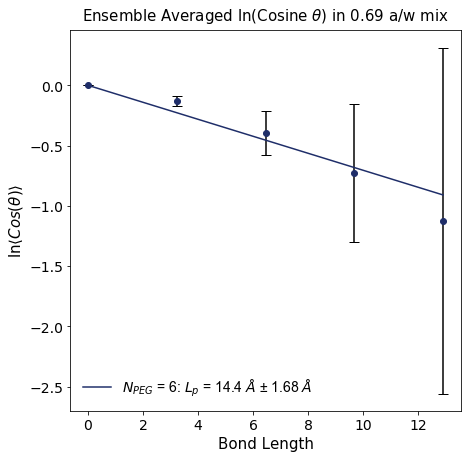

In [63]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_awmix, gg_n6peg_awmix, color='#1F2E69')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 14.4 $\AA$ ± 1.68 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [54]:
rgpeg_olig_awmix =  pd.DataFrame(data=n6_blkspeg_awmix["Avg Radius of gyration"], columns=['$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w'])
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w
0,4.169492
1,4.262122
2,4.426009
3,4.103104
4,4.205842


In [55]:
pers_pegt_awmix = pd.DataFrame(data=n6_blkspeg_awmix["Avg persistence length"], columns=[r"$L_{p}$ [Angstrom] N = 6 PEG 0.69 a/w "])
pers_pegt_awmix

,$L_{p}$ [Angstrom] N = 6 PEG 0.69 a/w
0,13.681591
1,14.545927
2,17.394214
3,12.305072
4,13.896268


### N = 8 PEG/0.69 a/w mix

In [64]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_peg_awmix = mda.Universe("n8peg_awmix/n8peg_awmix.pdb", "n8peg_awmix/awmix_n8peg.xtc")

In [65]:
n8_peg_awmix.trajectory

<XTCReader n8peg_awmix/awmix_n8peg.xtc with 18001 frames of 59 atoms>

In [66]:
len(n8_peg_awmix.trajectory)

18001

In [67]:
#Select the polymer heavy atoms 
peg_n8awmix = n8_peg_awmix.select_atoms("resname sPEG PEG tPEG and not type H")

In [68]:
crv_n8peg_awmix = pers_length(peg_n8awmix,8)
crv_n8peg_awmix

array([[ 1.        ,  0.99416704,  0.99517693,  0.9906698 ,  0.98890063,
         0.98136093,  0.98223373],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  8.54455237,
        11.07966605, 10.81635372]])

In [69]:
com_bond_n8awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n8_peg_awmix.trajectory[0:18000]:
    n8_mon1_awmix = n8_peg_awmix.select_atoms("resid 1")
    n8_mon2_awmix = n8_peg_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1_awmix.center_of_mass(), n8_mon2_awmix.center_of_mass(), 
                                                   box=n8_peg_awmix.trajectory.ts.dimensions)
    com_bond_n8awmix[0, count] = oo_len
    count += 1
    

In [70]:
com_bond_n8awmix

array([[3.29661362, 3.18489478, 3.03956132, ..., 3.06135973, 2.96323469,
        3.3490332 ]])

In [71]:
lb_awmix_pn6

3.223841660480229

In [72]:
np.std(com_bond)

0.1574573898792014

In [73]:
np.mean(com_bond_n8awmix)

3.229060119244199

In [74]:
np.std(com_bond_n8awmix)

0.1567876829876279

### Radius of Gyration vs. time N = 8 PEG/0.69 mol a-w mix

In [75]:
n8peg_rgens_awmix, cor_n8peg_awmix, N8peg_cos_awmix, rgawmix_n8peg = get_rg_pers_poly(peg_n8awmix, n8_peg_awmix, 0, 18000)

In [76]:
n8peg_rgens_awmix[0].shape

(18000,)

In [77]:
cor_n8peg_awmix[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [78]:
N8peg_cos_awmix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99416704, 0.93105928, 0.92485144, ..., 0.89450736, 0.84723151,
        0.87393683],
       [0.99517693, 0.87506964, 0.83553902, ..., 0.72247318, 0.66129761,
        0.64857109],
       ...,
       [0.98890063, 0.80334297, 0.64732794, ..., 0.53925762, 0.60503087,
        0.42174146],
       [0.98136093, 0.72135443, 0.74911421, ..., 0.46470543, 0.69921933,
        0.35360454],
       [0.98223373, 0.45809443, 0.73306931, ..., 0.72359263, 0.93165957,
        0.54909163]])

In [79]:
rgawmix_n8peg

5.0548298738519595

In [80]:
np.std(n8peg_rgens_awmix)

0.842606159754145

(0.2, 2)

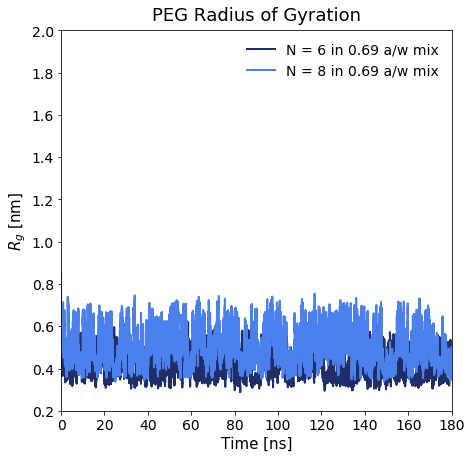

In [81]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_awmix[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens_awmix[0]/10,linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PEG/acetone

In [82]:
# x values
blen_n8awmix = cor_n8peg_awmix[3]*lb_awmix_pn6
#nt_tt[0] = 0
blen_n8awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996])

In [83]:
mk_n8p_awmix = cor_n8peg_awmix[1]/cor_n8peg_awmix[0]
mk_n8p_awmix

array([3.80115172e-17, 3.46940399e-02, 1.29129350e-01, 3.09022933e-01,
       5.50904936e-01, 8.67573507e-01, 1.26128664e+00])

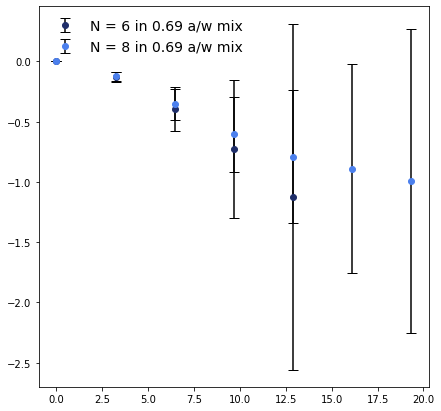

In [84]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix'], frameon=False, fontsize=14)

In [85]:
# All the points give the best fits for N = 6 peg in water
n8_blkspeg_awmix , n8peg_lpawmix = bavg_pers_cnt(5, peg_n8awmix, n8_peg_awmix, lb_awmix_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 16.404988640342378
Error in Lp from fit [Angstroms], 95% CL : 1.586490049884505
R2 score: 0.9818240140310551
6000
9000
Lp [Angstroms]: 16.947136362548708
Error in Lp from fit [Angstroms], 95% CL : 1.4063709248412672
R2 score: 0.9862786068893248
9000
12000
Lp [Angstroms]: 17.42357013284116
Error in Lp from fit [Angstroms], 95% CL : 1.4475726591525597
R2 score: 0.9857358651704029
12000
15000
Lp [Angstroms]: 18.350388090863543
Error in Lp from fit [Angstroms], 95% CL : 1.430316635304208
R2 score: 0.987571795590092
15000
18000
Lp [Angstroms]: 14.848800710889087
Error in Lp from fit [Angstroms], 95% CL : 1.555798168068354
R2 score: 0.9788622562245511


In [86]:
n8_blkspeg_awmix

{'Avg Radius of gyration': array([5.10054498, 5.14358767, 5.03966482, 5.21116913, 4.8331832 ]),
 'Avg persistence length': array([16.40498864, 16.94713636, 17.42357013, 18.35038809, 14.84880071])}

In [87]:
n8peg_lpawmix

array([[ 1.64049886e+01,  1.69471364e+01,  1.74235701e+01,
         1.83503881e+01,  1.48488007e+01],
       [ 1.58649005e+00,  1.40637092e+00,  1.44757266e+00,
         1.43031664e+00,  1.55579817e+00],
       [-6.09570675e-02, -5.90070192e-02, -5.73935188e-02,
        -5.44947603e-02, -6.73455062e-02],
       [ 1.63986553e-03,  1.13149263e-03,  1.07292514e-03,
         8.51374491e-04,  2.34951524e-03]])

In [88]:
n8peg_lpawmix[2]

array([-0.06095707, -0.05900702, -0.05739352, -0.05449476, -0.06734551])

In [89]:
np.mean(n8peg_lpawmix[3])

0.001409034606594672

In [90]:
blen_n8awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996])

In [92]:
gg_n8peg_awmix = line_fit(np.mean(n8peg_lpawmix[2]),blen_n8awmix)

In [93]:
gg_n6peg_n8awmix = line_fit(np.mean(n6peg_lpawmix[2]),blen_n8awmix)

In [94]:
gg_n8peg_awmix

array([-0.        , -0.19291331, -0.38582663, -0.57873994, -0.77165325,
       -0.96456656, -1.15747988])

### Block averaged Radius of gyration and persistence length, N = 8 PEG/0.69 mole a-w mix

In [95]:
np.mean(n8_blkspeg_awmix["Avg persistence length"])

16.794976787496978

In [96]:
np.std(n8_blkspeg_awmix["Avg persistence length"])

1.1642403986130485

In [97]:
np.mean(n8_blkspeg_awmix["Avg Radius of gyration"])

5.065629961519501

In [98]:
np.std(n8_blkspeg_awmix["Avg Radius of gyration"])

0.12898356244779305

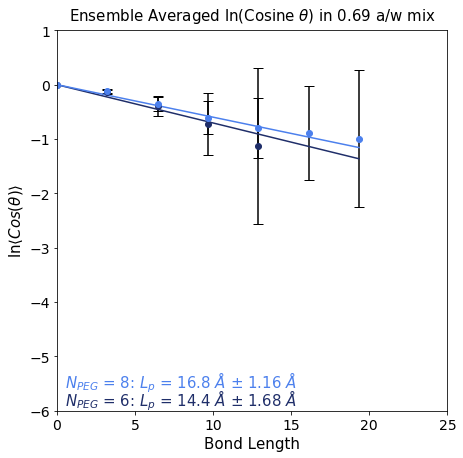

In [99]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8awmix, gg_n6peg_n8awmix, color='#1F2E69')
plt.plot(blen_n8awmix, gg_n8peg_awmix, color='#4C80ED')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,25)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 14.4 $\AA$ ± 1.68 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 16.8 $\AA$ ± 1.16 $\AA$', fontsize=15, color='#4C80ED')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [100]:
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w
0,4.169492
1,4.262122
2,4.426009
3,4.103104
4,4.205842


In [101]:
rgpeg_olig_awmix[r"$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix"] = n8_blkspeg_awmix["Avg Radius of gyration"]
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix
0,4.169492,5.100545
1,4.262122,5.143588
2,4.426009,5.039665
3,4.103104,5.211169
4,4.205842,4.833183


In [102]:
pers_pegt_awmix[r"$L_{p}$ [Angstrom] N = 8 PEG 0.69 a/w mix "] = n8_blkspeg_awmix["Avg persistence length"]
pers_pegt_awmix

,$L_{p}$ [Angstrom] N = 6 PEG 0.69 a/w,$L_{p}$ [Angstrom] N = 8 PEG 0.69 a/w mix
0,13.681591,16.404989
1,14.545927,16.947136
2,17.394214,17.423570
3,12.305072,18.350388
4,13.896268,14.848801


### N = 10 PEG/0.69 a/w mix

In [103]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_peg_awmix = mda.Universe("n10peg_awmix/n10peg_awmix.pdb", "n10peg_awmix/awmix_n10peg.xtc")

In [104]:
n10_peg_awmix.trajectory

<XTCReader n10peg_awmix/awmix_n10peg.xtc with 18001 frames of 73 atoms>

In [105]:
len(n10_peg_awmix.trajectory)

18001

In [106]:
#Select the polymer heavy atoms 
peg_n10awmix = n10_peg_awmix.select_atoms("resname sPEG PEG tPEG and not type H")

In [107]:
crv_n10peg_awmix = pers_length(peg_n10awmix,10)
crv_n10peg_awmix

array([[1.        , 0.99442598, 0.9954478 , 0.99309919, 0.9949163 ,
        0.99351363, 0.99251918, 0.99408355, 0.98978374],
       [0.        , 1.        , 2.        , 3.        , 4.        ,
        5.        , 6.        , 7.        , 8.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 8.19698206]])

In [110]:
com_bond_n10awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n10_peg_awmix.trajectory[0:18000]:
    n10_mon1_awmix = n10_peg_awmix.select_atoms("resid 1")
    n10_mon2_awmix = n10_peg_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1_awmix.center_of_mass(), n10_mon2_awmix.center_of_mass(), 
                                                   box=n10_peg_awmix.trajectory.ts.dimensions)
    com_bond_n10awmix[0, count] = oo_len
    count += 1
    

In [111]:
com_bond_n10awmix

array([[3.28484886, 3.3999494 , 3.15498368, ..., 3.38784891, 3.30145279,
        2.9609651 ]])

In [112]:
lb_awmix_pn6

3.223841660480229

In [113]:
np.std(com_bond)

0.1574573898792014

In [114]:
np.mean(com_bond_n10awmix)

3.227312668795366

In [115]:
np.std(com_bond_n10awmix)

0.16168291072572283

### Radius of Gyration vs. time N = 10 PEG/0.69 mol a-w mix

In [116]:
n10peg_rgens_awmix, cor_n10peg_awmix, N10peg_cos_awmix, rgawmix_n10peg = get_rg_pers_poly(peg_n10awmix, n10_peg_awmix, 0, 18000)

In [117]:
n10peg_rgens_awmix[0].shape

(18000,)

In [118]:
cor_n10peg_awmix[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [119]:
N10peg_cos_awmix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99442598, 0.98230503, 0.95164096, ..., 0.86876577, 0.85403843,
        0.8785998 ],
       [0.9954478 , 0.95922074, 0.90187973, ..., 0.70190367, 0.65284249,
        0.68391825],
       ...,
       [0.99251918, 0.91646838, 0.90616103, ..., 0.81494568, 0.75242883,
        0.59607243],
       [0.99408355, 0.94374639, 0.89820007, ..., 0.67043195, 0.67786963,
        0.47726812],
       [0.98978374, 0.95701953, 0.92251706, ..., 0.65368085, 0.68631626,
        0.58479091]])

In [120]:
rgawmix_n10peg

5.861103215153206

In [121]:
np.std(n10peg_rgens_awmix)

1.0436180490567892

(0.2, 2)

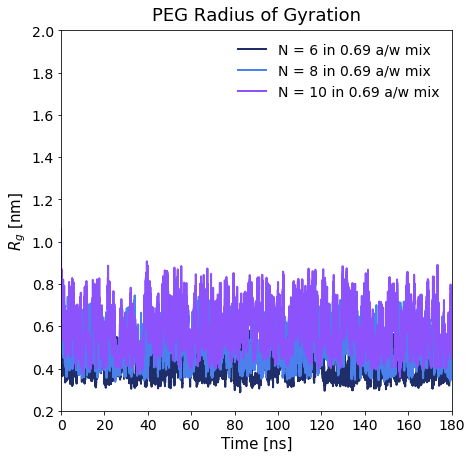

In [122]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_awmix[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens_awmix[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens_awmix[0]/10,linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PEG/0.69 a-w mixture

In [123]:
# x values
blen_n10awmix = cor_n10peg_awmix[3]*lb_awmix_pn6
#nt_tt[0] = 0
blen_n10awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996, 22.56689162, 25.79073328])

In [124]:
mk_n10p_awmix = cor_n10peg_awmix[1]/cor_n10peg_awmix[0]
mk_n10p_awmix

array([3.79574340e-17, 2.83744432e-02, 1.04519954e-01, 2.35868367e-01,
       3.91266841e-01, 5.66774811e-01, 7.69775771e-01, 1.01946757e+00,
       1.40805811e+00])

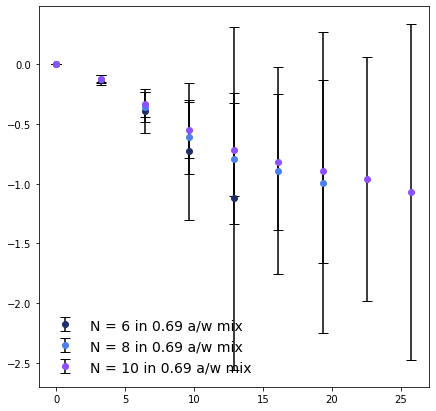

In [145]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10peg_awmix[0]), yerr=mk_n10p_awmix, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix'], frameon=False, fontsize=14)

In [126]:
# All the points give the best fits for N = 6 peg in water
n10_blkspeg_awmix , n10peg_lpawmix = bavg_pers_cnt(5, peg_n10awmix, n10_peg_awmix, lb_awmix_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.65653404621097
Error in Lp from fit [Angstroms], 95% CL : 0.8305525706165654
R2 score: 0.9886656327437687
6000
9000
Lp [Angstroms]: 18.522166353886
Error in Lp from fit [Angstroms], 95% CL : 0.8938605119965569
R2 score: 0.9872196496252449
9000
12000
Lp [Angstroms]: 20.1516361809146
Error in Lp from fit [Angstroms], 95% CL : 0.757815305737331
R2 score: 0.9918465780166434
12000
15000
Lp [Angstroms]: 17.702962118968706
Error in Lp from fit [Angstroms], 95% CL : 0.9042709241874292
R2 score: 0.9854958289747408
15000
18000
Lp [Angstroms]: 17.145308361349507
Error in Lp from fit [Angstroms], 95% CL : 0.8459841130176011
R2 score: 0.9866419085167226


In [127]:
n10_blkspeg_awmix

{'Avg Radius of gyration': array([5.8961094 , 5.97189109, 6.07544857, 5.80541691, 5.69963056]),
 'Avg persistence length': array([18.65653405, 18.52216635, 20.15163618, 17.70296212, 17.14530836])}

In [128]:
n10peg_lpawmix

array([[ 1.86565340e+01,  1.85221664e+01,  2.01516362e+01,
         1.77029621e+01,  1.71453084e+01],
       [ 8.30552571e-01,  8.93860512e-01,  7.57815306e-01,
         9.04270924e-01,  8.45984113e-01],
       [-5.36005240e-02, -5.39893650e-02, -4.96237621e-02,
        -5.64877218e-02, -5.83249936e-02],
       [ 7.36971767e-04,  8.78643780e-04,  4.50739841e-04,
         1.07759069e-03,  1.07197256e-03]])

In [129]:
n10peg_lpawmix[2]

array([-0.05360052, -0.05398937, -0.04962376, -0.05648772, -0.05832499])

In [130]:
np.mean(n10peg_lpawmix[3])

0.0008431837284708253

In [131]:
blen_n10awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996, 22.56689162, 25.79073328])

In [132]:
gg_n10peg_awmix = line_fit(np.mean(n10peg_lpawmix[2]),blen_n10awmix)

In [133]:
gg_n6peg_n10awmix = line_fit(np.mean(n6peg_lpawmix[2]),blen_n10awmix)

In [134]:
gg_n8peg_n10awmix = line_fit(np.mean(n8peg_lpawmix[2]),blen_n10awmix)

In [135]:
gg_n10peg_awmix

array([-0.        , -0.17539399, -0.35078797, -0.52618196, -0.70157595,
       -0.87696993, -1.05236392, -1.22775791, -1.40315189])

### Block averaged Radius of gyration and persistence length, N = 10 PEG/0.69 mole a-w mix

In [136]:
np.mean(n10_blkspeg_awmix["Avg persistence length"])

18.435721412265956

In [137]:
np.std(n10_blkspeg_awmix["Avg persistence length"])

1.0200682785379558

In [138]:
np.mean(n10_blkspeg_awmix["Avg Radius of gyration"])

5.889699305557459

In [139]:
np.std(n10_blkspeg_awmix["Avg Radius of gyration"])

0.1300223208693451

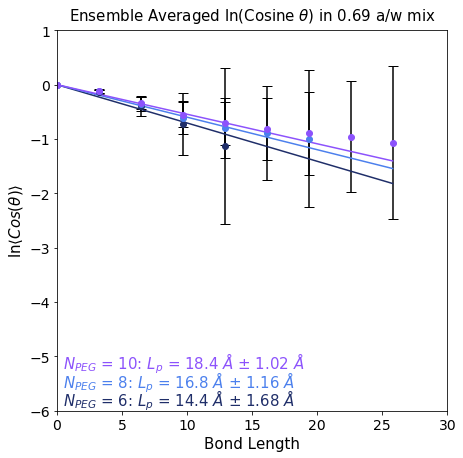

In [141]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10peg_awmix[0]), yerr=mk_n10p_awmix, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10awmix, gg_n6peg_n10awmix, color='#1F2E69')
plt.plot(blen_n10awmix, gg_n8peg_n10awmix, color='#4C80ED')
plt.plot(blen_n10awmix, gg_n10peg_awmix, color='#8C52FC')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,30)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 14.4 $\AA$ ± 1.68 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 16.8 $\AA$ ± 1.16 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 18.4 $\AA$ ± 1.02 $\AA$', fontsize=15, color='#8C52FC')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [142]:
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix
0,4.169492,5.100545
1,4.262122,5.143588
2,4.426009,5.039665
3,4.103104,5.211169
4,4.205842,4.833183


In [143]:
rgpeg_olig_awmix[r"$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix"] = n10_blkspeg_awmix["Avg Radius of gyration"]
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix
0,4.169492,5.100545,5.896109
1,4.262122,5.143588,5.971891
2,4.426009,5.039665,6.075449
3,4.103104,5.211169,5.805417
4,4.205842,4.833183,5.699631


In [144]:
pers_pegt_awmix[r"$L_{p}$ [Angstrom] N = 10 PEG 0.69 a/w mix "] = n10_blkspeg_awmix["Avg persistence length"]
pers_pegt_awmix

,$L_{p}$ [Angstrom] N = 6 PEG 0.69 a/w,$L_{p}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PEG 0.69 a/w mix
0,13.681591,16.404989,18.656534
1,14.545927,16.947136,18.522166
2,17.394214,17.423570,20.151636
3,12.305072,18.350388,17.702962
4,13.896268,14.848801,17.145308


### N = 20 PEG/0.69 a/w mix

In [146]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_peg_awmix = mda.Universe("n20peg_awmix/n20peg_awmix.pdb", "n20peg_awmix/awmix_n20peg.xtc")

In [147]:
n20_peg_awmix.trajectory

<XTCReader n20peg_awmix/awmix_n20peg.xtc with 18001 frames of 143 atoms>

In [148]:
len(n20_peg_awmix.trajectory)

18001

In [149]:
#Select the polymer heavy atoms 
peg_n20awmix = n20_peg_awmix.select_atoms("resname sPEG PEG tPEG and not type H")

In [150]:
crv_n20peg_awmix = pers_length(peg_n20awmix,20)
crv_n20peg_awmix

array([[ 1.        ,  0.99245257,  0.98957367,  0.98760832,  0.98911672,
         0.98752002,  0.98658881,  0.99074775,  0.99107969,  0.99026135,
         0.98903163,  0.99052371,  0.99127219,  0.99060969,  0.98937761,
         0.98764505,  0.98580137,  0.98454501,  0.97479729],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        ,  0.        ,  8.28097249,  9.02926191,  8.46081638,
         9.06144033,  9.39415841,  0.        ,  0.        ,  0.        ,
         8.49388489,  0.        ,  0.        ,  0.        ,  8.35860906,
         9.01584087,  9.66665287, 10.0863238 , 12.89073188]])

In [151]:
com_bond_n20awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n20_peg_awmix.trajectory[0:18000]:
    n20_mon1_awmix = n20_peg_awmix.select_atoms("resid 1")
    n20_mon2_awmix = n20_peg_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1_awmix.center_of_mass(), n20_mon2_awmix.center_of_mass(), 
                                                   box=n20_peg_awmix.trajectory.ts.dimensions)
    com_bond_n20awmix[0, count] = oo_len
    count += 1
    

In [152]:
com_bond_n20awmix

array([[3.4331007 , 3.26992409, 3.36865923, ..., 3.24514234, 3.39669675,
        3.34151538]])

In [153]:
lb_awmix_pn6

3.223841660480229

In [154]:
np.std(com_bond)

0.1574573898792014

In [155]:
np.mean(com_bond_n20awmix)

3.221310674725363

In [156]:
np.std(com_bond_n20awmix)

0.1647709546891111

### Radius of Gyration vs. time N = 20 PEG/0.69 mol a-w mix

In [157]:
n20peg_rgens_awmix, cor_n20peg_awmix, N20peg_cos_awmix, rgawmix_n20peg = get_rg_pers_poly(peg_n20awmix, n20_peg_awmix, 0, 18000)

In [158]:
n20peg_rgens_awmix[0].shape

(18000,)

In [159]:
cor_n20peg_awmix[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [160]:
N20peg_cos_awmix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99245257, 0.97695291, 0.96134257, ..., 0.89657145, 0.88525031,
        0.88517527],
       [0.98957367, 0.95996801, 0.93748418, ..., 0.74073417, 0.72473397,
        0.72136232],
       ...,
       [0.98580137, 0.91663637, 0.87721374, ..., 0.90412024, 0.89466163,
        0.97119512],
       [0.98454501, 0.89850638, 0.90051797, ..., 0.84120693, 0.86946366,
        0.94516283],
       [0.97479729, 0.89472547, 0.98088698, ..., 0.65968095, 0.89761715,
        0.87217267]])

In [161]:
rgawmix_n20peg

8.175410631176737

In [162]:
np.std(n20peg_rgens_awmix)

1.807117426663796

(0.2, 2)

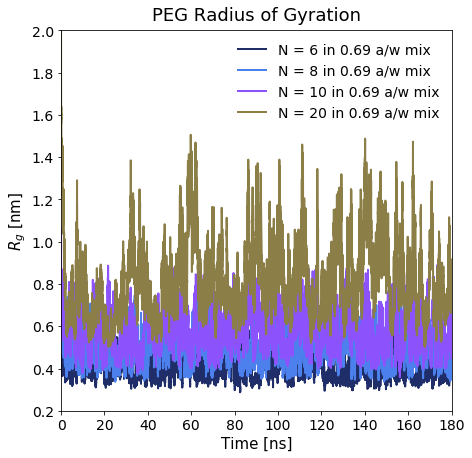

In [163]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_awmix[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens_awmix[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens_awmix[0]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, n20peg_rgens_awmix[0]/10,linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix','N = 20 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 20 PEG/0.69 a-w mixture

In [164]:
# x values
blen_n20awmix = cor_n20peg_awmix[3]*lb_awmix_pn6
#nt_tt[0] = 0
blen_n20awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996, 22.56689162, 25.79073328, 29.01457494,
       32.2384166 , 35.46225827, 38.68609993, 41.90994159, 45.13378325,
       48.35762491, 51.58146657, 54.80530823, 58.02914989])

In [165]:
mk_n20p_awmix = cor_n20peg_awmix[1]/cor_n20peg_awmix[0]
mk_n20p_awmix

array([1.95824935e-17, 1.82444455e-02, 6.52903587e-02, 1.47730945e-01,
       2.45820035e-01, 3.30981135e-01, 3.95964578e-01, 4.72143731e-01,
       5.49942066e-01, 6.34841307e-01, 7.52306841e-01, 8.83855689e-01,
       1.01625835e+00, 1.12171219e+00, 1.19239376e+00, 1.26653602e+00,
       1.39221805e+00, 1.50567335e+00, 1.75833278e+00])

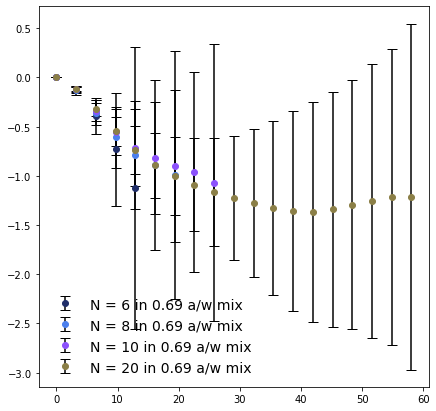

In [166]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10peg_awmix[0]), yerr=mk_n10p_awmix, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20peg_awmix[0]), yerr=mk_n20p_awmix, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix'
            ,'N = 20 in 0.69 a/w mix'], frameon=False, fontsize=14)

In [167]:
# All the points give the best fits for N = 6 peg in water
n20_blkspeg_awmix , n20peg_lpawmix = bavg_pers_cnt(5, peg_n20awmix, n20_peg_awmix, lb_awmix_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.535404192136493
Error in Lp from fit [Angstroms], 95% CL : 0.23314908241026708
R2 score: 0.9864676457073789
6000
9000
Lp [Angstroms]: 19.550814447495227
Error in Lp from fit [Angstroms], 95% CL : 0.2260822791206977
R2 score: 0.9884419115942585
9000
12000
Lp [Angstroms]: 18.556178830673627
Error in Lp from fit [Angstroms], 95% CL : 0.25016386586161077
R2 score: 0.9846243543867519
12000
15000
Lp [Angstroms]: 19.54019329419684
Error in Lp from fit [Angstroms], 95% CL : 0.1964853621371459
R2 score: 0.9910052344253666
15000
18000
Lp [Angstroms]: 16.766024385098724
Error in Lp from fit [Angstroms], 95% CL : 0.26373698556197894
R2 score: 0.9795946367627334


In [168]:
n20_blkspeg_awmix

{'Avg Radius of gyration': array([8.24342505, 8.37699629, 8.41449589, 8.93052831, 7.90764455]),
 'Avg persistence length': array([18.53540419, 19.55081445, 18.55617883, 19.54019329, 16.76602439])}

In [169]:
n20peg_lpawmix

array([[ 1.85354042e+01,  1.95508144e+01,  1.85561788e+01,
         1.95401933e+01,  1.67660244e+01],
       [ 2.33149082e-01,  2.26082279e-01,  2.50163866e-01,
         1.96485362e-01,  2.63736986e-01],
       [-5.39508062e-02, -5.11487643e-02, -5.38904054e-02,
        -5.11765664e-02, -5.96444319e-02],
       [ 9.31985367e-04,  7.07984168e-04,  1.06818107e-03,
         5.35913747e-04,  1.78144172e-03]])

In [170]:
n20peg_lpawmix[2]

array([-0.05395081, -0.05114876, -0.05389041, -0.05117657, -0.05964443])

In [171]:
np.mean(n20peg_lpawmix[3])

0.0010051012144948756

In [172]:
blen_n20awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996, 22.56689162, 25.79073328, 29.01457494,
       32.2384166 , 35.46225827, 38.68609993, 41.90994159, 45.13378325,
       48.35762491, 51.58146657, 54.80530823, 58.02914989])

In [229]:
gg_n20peg_awmix = line_fit(np.mean(n20peg_lpawmix[2]),blen_n20awmix)

In [230]:
gg_n6peg_n20awmix = line_fit(np.mean(n6peg_lpawmix[2]),blen_n20awmix)

In [231]:
gg_n8peg_n20awmix = line_fit(np.mean(n8peg_lpawmix[2]),blen_n20awmix)

In [232]:
gg_n10peg_n20awmix = line_fit(np.mean(n10peg_lpawmix[2]),blen_n20awmix)

In [233]:
gg_n20peg_awmix

array([-0.        , -0.17396557, -0.34793114, -0.52189672, -0.69586229,
       -0.86982786, -1.04379343, -1.217759  , -1.39172457, -1.56569015,
       -1.73965572, -1.91362129, -2.08758686, -2.26155243, -2.43551801,
       -2.60948358, -2.78344915, -2.95741472, -3.13138029])

### Block averaged Radius of gyration and persistence length, N = 20 PEG/0.69 mole a-w mix

In [178]:
np.mean(n20_blkspeg_awmix["Avg persistence length"])

18.589723029920187

In [179]:
np.std(n20_blkspeg_awmix["Avg persistence length"])

1.0155828801998814

In [180]:
np.mean(n20_blkspeg_awmix["Avg Radius of gyration"])

8.374618018798438

In [181]:
np.std(n20_blkspeg_awmix["Avg Radius of gyration"])

0.3304263823873141

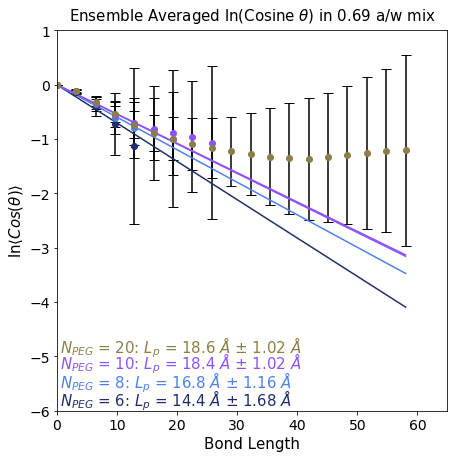

In [234]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10peg_awmix[0]), yerr=mk_n10p_awmix, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20peg_awmix[0]), yerr=mk_n20p_awmix, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20awmix, gg_n6peg_n20awmix, color='#1F2E69')
plt.plot(blen_n20awmix, gg_n8peg_n20awmix, color='#4C80ED')
plt.plot(blen_n20awmix, gg_n10peg_n20awmix, color='#8C52FC')
plt.plot(blen_n20awmix, gg_n20peg_awmix, color='#8C52FC')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,65)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 14.4 $\AA$ ± 1.68 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 16.8 $\AA$ ± 1.16 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 18.4 $\AA$ ± 1.02 $\AA$', fontsize=15, color='#8C52FC')
plt.text(0.5,-4.93,r'$N_{PEG}$ = 20: $L_{p}$ = 18.6 $\AA$ ± 1.02 $\AA$', fontsize=15, color='#8B7F47')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [182]:
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix
0,4.169492,5.100545,5.896109
1,4.262122,5.143588,5.971891
2,4.426009,5.039665,6.075449
3,4.103104,5.211169,5.805417
4,4.205842,4.833183,5.699631


In [183]:
rgpeg_olig_awmix[r"$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix"] = n20_blkspeg_awmix["Avg Radius of gyration"]
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix
0,4.169492,5.100545,5.896109,8.243425
1,4.262122,5.143588,5.971891,8.376996
2,4.426009,5.039665,6.075449,8.414496
3,4.103104,5.211169,5.805417,8.930528
4,4.205842,4.833183,5.699631,7.907645


In [184]:
pers_pegt_awmix[r"$L_{p}$ [Angstrom] N = 20 PEG 0.69 a/w mix "] = n20_blkspeg_awmix["Avg persistence length"]
pers_pegt_awmix

,$L_{p}$ [Angstrom] N = 6 PEG 0.69 a/w,$L_{p}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PEG 0.69 a/w mix,$L_{p}$ [Angstrom] N = 20 PEG 0.69 a/w mix
0,13.681591,16.404989,18.656534,18.535404
1,14.545927,16.947136,18.522166,19.550814
2,17.394214,17.423570,20.151636,18.556179
3,12.305072,18.350388,17.702962,19.540193
4,13.896268,14.848801,17.145308,16.766024


### N = 30 PEG/0.69 a/w mix

In [185]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_peg_awmix = mda.Universe("n30peg_awmix/n30peg_awmix.pdb", "n30peg_awmix/awmix_n30peg.xtc")

In [186]:
n30_peg_awmix.trajectory

<XTCReader n30peg_awmix/awmix_n30peg.xtc with 18001 frames of 213 atoms>

In [187]:
len(n30_peg_awmix.trajectory)

18001

In [188]:
#Select the polymer heavy atoms 
peg_n30awmix = n30_peg_awmix.select_atoms("resname sPEG PEG tPEG and not type H")

In [189]:
crv_n30peg_awmix = pers_length(peg_n30awmix,30)
crv_n30peg_awmix

array([[  1.        ,   0.93621892,   0.84810587,   0.80960704,
          0.79527516,   0.77650387,   0.75480013,   0.74475702,
          0.74489434,   0.73541625,   0.74571705,   0.71938951,
          0.70188826,   0.68199042,   0.66682602,   0.65256748,
          0.62368373,   0.59767216,   0.58152834,   0.56005043,
          0.5373592 ,   0.49241093,   0.45106066,   0.41667401,
          0.37450537,   0.2548416 ,   0.13478932,  -0.11991324,
         -0.32312976],
       [  0.        ,   1.        ,   2.        ,   3.        ,
          4.        ,   5.        ,   6.        ,   7.        ,
          8.        ,   9.        ,  10.        ,  11.        ,
         12.        ,  13.        ,  14.        ,  15.        ,
         16.        ,  17.        ,  18.        ,  19.        ,
         20.        ,  21.        ,  22.        ,  23.        ,
         24.        ,  25.        ,  26.        ,  27.        ,
         28.        ],
       [  0.        ,  20.57402894,  31.99375289,  35.9424

In [190]:
com_bond_n30awmix = np.zeros(shape=(1,18000))
count = 0
for ts in n30_peg_awmix.trajectory[0:18000]:
    n30_mon1_awmix = n30_peg_awmix.select_atoms("resid 1")
    n30_mon2_awmix = n30_peg_awmix.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1_awmix.center_of_mass(), n30_mon2_awmix.center_of_mass(), 
                                                   box=n30_peg_awmix.trajectory.ts.dimensions)
    com_bond_n30awmix[0, count] = oo_len
    count += 1
    

In [191]:
com_bond_n30awmix

array([[3.31992852, 3.20007805, 2.57053017, ..., 3.16035102, 2.94809843,
        3.1594233 ]])

In [192]:
lb_awmix_pn6

3.223841660480229

In [193]:
np.std(com_bond)

0.1574573898792014

In [194]:
np.mean(com_bond_n30awmix)

3.222894869756002

In [195]:
np.std(com_bond_n30awmix)

0.16118639013939728

### Radius of Gyration vs. time N = 30 PEG/0.69 mol a-w mix

In [196]:
n30peg_rgens_awmix, cor_n30peg_awmix, N30peg_cos_awmix, rgawmix_n30peg = get_rg_pers_poly(peg_n30awmix, n30_peg_awmix, 0, 18000)

In [197]:
n30peg_rgens_awmix[0].shape

(18000,)

In [198]:
cor_n30peg_awmix[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [199]:
N30peg_cos_awmix

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93621892,  0.93193298,  0.91178371, ...,  0.90130161,
         0.90753582,  0.90867149],
       [ 0.84810587,  0.85317206,  0.80888255, ...,  0.7148259 ,
         0.72753648,  0.73874103],
       ...,
       [ 0.13478932,  0.28743783,  0.43420773, ...,  0.76142402,
         0.79100258,  0.71977574],
       [-0.11991324,  0.08036086,  0.52202579, ...,  0.80678692,
         0.87712078,  0.78401162],
       [-0.32312976, -0.16426506,  0.63654681, ...,  0.87981148,
         0.97918418,  0.85566228]])

In [200]:
rgawmix_n30peg

9.66044538358211

In [201]:
np.std(n30peg_rgens_awmix)

2.2233921417146987

(0.2, 3)

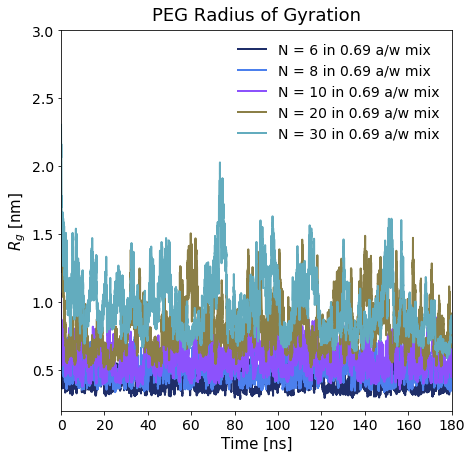

In [225]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_awmix[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens_awmix[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens_awmix[0]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, n20peg_rgens_awmix[0]/10,linewidth=2, color='#8B7F47')
plt.plot(trj_len/100, n30peg_rgens_awmix[0]/10,linewidth=2, color='#63ACBE')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix'
            ,'N = 20 in 0.69 a/w mix','N = 30 in 0.69 a/w mix'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 30 PEG/0.69 a-w mixture

In [203]:
# x values
blen_n30awmix = cor_n30peg_awmix[3]*lb_awmix_pn6
#nt_tt[0] = 0
blen_n30awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996, 22.56689162, 25.79073328, 29.01457494,
       32.2384166 , 35.46225827, 38.68609993, 41.90994159, 45.13378325,
       48.35762491, 51.58146657, 54.80530823, 58.02914989, 61.25299155,
       64.47683321, 67.70067487, 70.92451653, 74.14835819, 77.37219985,
       80.59604151, 83.81988317, 87.04372483, 90.26756649])

In [204]:
mk_n30p_awmix = cor_n30peg_awmix[1]/cor_n30peg_awmix[0]
mk_n30p_awmix

array([2.18938933e-18, 1.31734388e-02, 4.67588689e-02, 1.03893075e-01,
       1.68653843e-01, 2.37128169e-01, 3.08022309e-01, 3.68562198e-01,
       4.11356281e-01, 4.47929938e-01, 4.95052111e-01, 5.52662331e-01,
       6.18891911e-01, 6.81932358e-01, 7.40720261e-01, 7.97748651e-01,
       8.67366044e-01, 9.41673494e-01, 1.01040929e+00, 1.07952722e+00,
       1.12465465e+00, 1.15015578e+00, 1.18995993e+00, 1.26206767e+00,
       1.35067979e+00, 1.43959296e+00, 1.64787860e+00, 1.93271923e+00,
       2.31563207e+00])

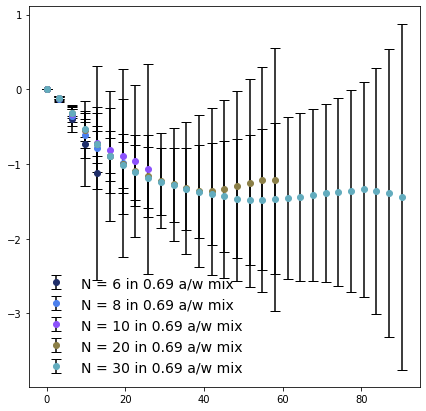

In [205]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10peg_awmix[0]), yerr=mk_n10p_awmix, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20peg_awmix[0]), yerr=mk_n20p_awmix, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30awmix, np.log(cor_n30peg_awmix[0]), yerr=mk_n30p_awmix, color='#63ACBE', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in 0.69 a/w mix','N = 8 in 0.69 a/w mix','N = 10 in 0.69 a/w mix'
            ,'N = 20 in 0.69 a/w mix','N = 30 in 0.69 a/w mix'], frameon=False, fontsize=14)

In [206]:
# All the points give the best fits for N = 6 peg in water
n30_blkspeg_awmix , n30peg_lpawmix = bavg_pers_cnt(5, peg_n30awmix, n30_peg_awmix, lb_awmix_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.104216854990764
Error in Lp from fit [Angstroms], 95% CL : 0.12601233222048494
R2 score: 0.9831843011068094
6000
9000
Lp [Angstroms]: 18.595729019380066
Error in Lp from fit [Angstroms], 95% CL : 0.13153898444317633
R2 score: 0.9826849430698631
9000
12000
Lp [Angstroms]: 19.044077722286847
Error in Lp from fit [Angstroms], 95% CL : 0.11593675602886533
R2 score: 0.9868594886406403
12000
15000
Lp [Angstroms]: 17.145787098682362
Error in Lp from fit [Angstroms], 95% CL : 0.13987980337346081
R2 score: 0.9775064144936043
15000
18000
Lp [Angstroms]: 18.088506980904608
Error in Lp from fit [Angstroms], 95% CL : 0.13355511639700562
R2 score: 0.9812634725951478


In [207]:
n30_blkspeg_awmix

{'Avg Radius of gyration': array([ 9.62601072, 10.11821658, 10.56326015,  8.54528844,  8.6380128 ]),
 'Avg persistence length': array([18.10421685, 18.59572902, 19.04407772, 17.1457871 , 18.08850698])}

In [208]:
n30peg_lpawmix

array([[ 1.81042169e+01,  1.85957290e+01,  1.90440777e+01,
         1.71457871e+01,  1.80885070e+01],
       [ 1.26012332e-01,  1.31538984e-01,  1.15936756e-01,
         1.39879803e-01,  1.33555116e-01],
       [-5.52357502e-02, -5.37757890e-02, -5.25097626e-02,
        -5.83233650e-02, -5.52837225e-02],
       [ 1.23676767e-03,  1.21070163e-03,  8.55034233e-04,
         1.89435476e-03,  1.39409114e-03]])

In [209]:
n30peg_lpawmix[2]

array([-0.05523575, -0.05377579, -0.05250976, -0.05832337, -0.05528372])

In [210]:
np.mean(n30peg_lpawmix[3])

0.0013181898883029529

In [211]:
blen_n30awmix

array([ 0.        ,  3.22384166,  6.44768332,  9.67152498, 12.89536664,
       16.1192083 , 19.34304996, 22.56689162, 25.79073328, 29.01457494,
       32.2384166 , 35.46225827, 38.68609993, 41.90994159, 45.13378325,
       48.35762491, 51.58146657, 54.80530823, 58.02914989, 61.25299155,
       64.47683321, 67.70067487, 70.92451653, 74.14835819, 77.37219985,
       80.59604151, 83.81988317, 87.04372483, 90.26756649])

In [212]:
gg_n30peg_awmix = line_fit(np.mean(n30peg_lpawmix[2]),blen_n30awmix)

In [213]:
gg_n6peg_n30awmix = line_fit(np.mean(n6peg_lpawmix[2]),blen_n30awmix)

In [214]:
gg_n8peg_n30awmix = line_fit(np.mean(n8peg_lpawmix[2]),blen_n30awmix)

In [215]:
gg_n10peg_n30awmix = line_fit(np.mean(n10peg_lpawmix[2]),blen_n30awmix)

In [216]:
gg_n20peg_n30awmix = line_fit(np.mean(n20peg_lpawmix[2]),blen_n30awmix)

In [217]:
gg_n20peg_awmix

array([-0.        , -0.17539399, -0.35078797, -0.52618196, -0.70157595,
       -0.87696993, -1.05236392, -1.22775791, -1.40315189])

### Block averaged Radius of gyration and persistence length, N = 30 PEG/0.69 mole a-w mix

In [218]:
np.mean(n30_blkspeg_awmix["Avg persistence length"])

18.19566353524893

In [219]:
np.std(n30_blkspeg_awmix["Avg persistence length"])

0.6327629222524327

In [220]:
np.mean(n30_blkspeg_awmix["Avg Radius of gyration"])

9.498157739189756

In [221]:
np.std(n30_blkspeg_awmix["Avg Radius of gyration"])

0.7978811579130153

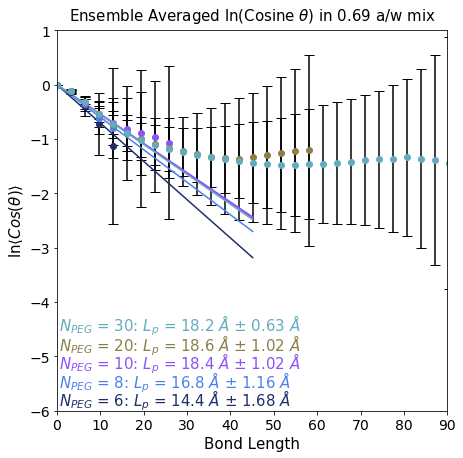

In [227]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_awmix, np.log(cor_n6peg_awmix[0]), yerr=mk_n6p_awmix, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8awmix, np.log(cor_n8peg_awmix[0]), yerr=mk_n8p_awmix, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10awmix, np.log(cor_n10peg_awmix[0]), yerr=mk_n10p_awmix, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20awmix, np.log(cor_n20peg_awmix[0]), yerr=mk_n20p_awmix, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30awmix, np.log(cor_n30peg_awmix[0]), yerr=mk_n30p_awmix, color='#63ACBE', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30awmix[:15], gg_n6peg_n30awmix[:15], color='#1F2E69')
plt.plot(blen_n30awmix[:15], gg_n8peg_n30awmix[:15], color='#4C80ED')
plt.plot(blen_n30awmix[:15], gg_n10peg_n30awmix[:15], color='#8C52FC')
plt.plot(blen_n30awmix[:15], gg_n20peg_n30awmix[:15], color='#8C52FC')
plt.plot(blen_n30awmix[:15], gg_n30peg_awmix[:15], color='#63ACBE')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in 0.69 a/w mix', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,90)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 14.4 $\AA$ ± 1.68 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 16.8 $\AA$ ± 1.16 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 18.4 $\AA$ ± 1.02 $\AA$', fontsize=15, color='#8C52FC')
plt.text(0.5,-4.90,r'$N_{PEG}$ = 20: $L_{p}$ = 18.6 $\AA$ ± 1.02 $\AA$', fontsize=15, color='#8B7F47')
plt.text(0.5,-4.53,r'$N_{PEG}$ = 30: $L_{p}$ = 18.2 $\AA$ ± 0.63 $\AA$', fontsize=15, color='#63ACBE')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [222]:
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix
0,4.169492,5.100545,5.896109,8.243425
1,4.262122,5.143588,5.971891,8.376996
2,4.426009,5.039665,6.075449,8.414496
3,4.103104,5.211169,5.805417,8.930528
4,4.205842,4.833183,5.699631,7.907645


In [223]:
rgpeg_olig_awmix[r"$R_{g}$ [Angstrom] N = 30 PEG 0.69 a/w mix"] = n30_blkspeg_awmix["Avg Radius of gyration"]
rgpeg_olig_awmix

,$R_{g}$ [Angstrom] N = 6 PEG 0.69 a/w,$R_{g}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 10 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 20 PEG 0.69 a/w mix,$R_{g}$ [Angstrom] N = 30 PEG 0.69 a/w mix
0,4.169492,5.100545,5.896109,8.243425,9.626011
1,4.262122,5.143588,5.971891,8.376996,10.118217
2,4.426009,5.039665,6.075449,8.414496,10.563260
3,4.103104,5.211169,5.805417,8.930528,8.545288
4,4.205842,4.833183,5.699631,7.907645,8.638013


In [235]:
rgpeg_olig_awmix.to_pickle("PEG_awmix_Rg.pkl")

In [224]:
pers_pegt_awmix[r"$L_{p}$ [Angstrom] N = 30 PEG 0.69 a/w mix "] = n30_blkspeg_awmix["Avg persistence length"]
pers_pegt_awmix

,$L_{p}$ [Angstrom] N = 6 PEG 0.69 a/w,$L_{p}$ [Angstrom] N = 8 PEG 0.69 a/w mix,$L_{p}$ [Angstrom] N = 10 PEG 0.69 a/w mix,$L_{p}$ [Angstrom] N = 20 PEG 0.69 a/w mix,$L_{p}$ [Angstrom] N = 30 PEG 0.69 a/w mix
0,13.681591,16.404989,18.656534,18.535404,18.104217
1,14.545927,16.947136,18.522166,19.550814,18.595729
2,17.394214,17.423570,20.151636,18.556179,19.044078
3,12.305072,18.350388,17.702962,19.540193,17.145787
4,13.896268,14.848801,17.145308,16.766024,18.088507


In [236]:
pers_pegt_awmix.to_pickle("PEG_awmix_Lp.pkl")

### Fluory Exponent, PEG/0.69 mol a-w mixture systems 

In [237]:
n_peg = np.array([6,8,10,20,30])
rg_npeg_awmix = np.array([np.mean(n6_blkspeg_awmix["Avg Radius of gyration"])
                    ,np.mean(n8_blkspeg_awmix["Avg Radius of gyration"]),np.mean(n10_blkspeg_awmix["Avg Radius of gyration"])
                    ,np.mean(n20_blkspeg_awmix["Avg Radius of gyration"]),np.mean(n30_blkspeg_awmix["Avg Radius of gyration"])])

In [238]:
rg_npegaw_std = np.array([np.std(np.log10(n6_blkspeg_awmix["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blkspeg_awmix["Avg Radius of gyration"])),np.std(np.log10(n10_blkspeg_awmix["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blkspeg_awmix["Avg Radius of gyration"])),np.std(np.log10(n30_blkspeg_awmix["Avg Radius of gyration"]))])

In [239]:
rg_npegaw_std

array([0.01111667, 0.01118276, 0.00959571, 0.01703361, 0.03664498])

In [240]:
rg_npeg_awmix

array([4.23331369, 5.06562996, 5.88969931, 8.37461802, 9.49815774])

In [219]:
n_peg

array([ 6,  8, 10, 20, 30])

In [241]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vawmix = LinearRegression(fit_intercept=True)
model_vawmix.fit(np.log10(n_peg).reshape(-1,1), np.log10(rg_npeg_awmix))
# Slope here is in nanometers
print("Model slope:    ", model_vawmix.coef_[0])
print("Model intercept:", model_vawmix.intercept_)

Model slope:     0.5058196638552609
Model intercept: 0.2481086696103808


In [242]:
gg_aw = model_vawmix.predict(np.log10(n_peg.reshape(-1,1)))
gg_aw

array([0.64171287, 0.70490934, 0.75392833, 0.90619522, 0.99526565])

In [243]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_npeg_awmix), gg_aw))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_npeg_awmix), gg_aw))

Mean Std Error: 0.00021585223601430092
R2 score: 0.98755237661597


In [244]:
# Residuals between the true y data and model y data 
resid_v = np.log10(rg_npeg_awmix) - gg_aw
resid_v

array([-0.01503242, -0.00027588,  0.01616479,  0.01676978, -0.01762627])

In [245]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_tt = np.log10(n_peg)
nt_tt -= np.mean(nt_tt)
nhui = nt_tt**2
np.sum(nhui)

0.334663876760361

In [246]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [247]:
# How to calculate 95% confidence interval for the slope 
flc_v = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_v**2)/len(resid_v))/(np.sum(nhui)))
flc_v

0.0705119862229519

Text(1.1, 0.78, '$v_{acet-water}$ = 0.51 ± 0.07')

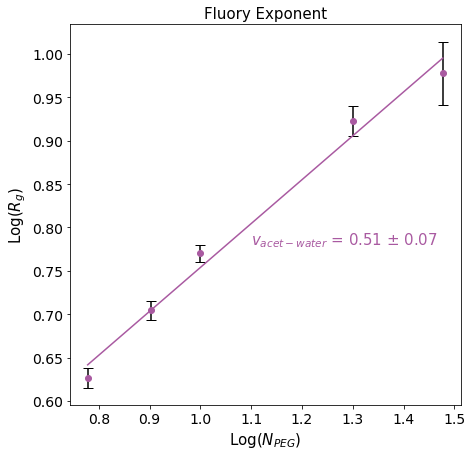

In [250]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_peg), np.log10(rg_npeg_awmix), yerr=rg_npegaw_std, color='#A95AA1', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_peg), gg_aw, color='#A95AA1')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PEG}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.78, r'$v_{acet-water}$ = 0.51 ± 0.07', fontsize=15, color='#A95AA1')